In [2]:
from src.Data.MakeDataset import MakeDataset
from src.Models.train import train
from src.Models.prediction import test
import Alarms
import pandas as pd
import joblib
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

sns.set(style='whitegrid',palette='muted',font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()


# Make Dataset

Detailed analysis on the data can be found on the notebooks where step by step is descibed the procedure followed to clean and process the data along with visualisations

In [3]:
make_data = MakeDataset(siteid=89247,missing_thres=0.5,group='milk_charcuterie',
                datapath='Data\Processed\HACCP.csv',
                temppath = 'Data\Processed\Temp.csv',
                censorspath = 'Data\Processed\S3S4.csv',
                sitepath = 'Data\Raw\Dinosol_Site_Information.csv')

In [ ]:
make_data.make_dataset()

# Training models

In [25]:
train_models =  train(datapath='Data\Processed\Temp.csv_milk_charcuterie_Train.pkl', assetspath='Data\Processed\89247_milk_charcuterie_assets.csv',siteid=89247)


In [ ]:
train_models.training()

# Test Model

In [12]:
test_model = test(siteid=89247,
                  datapath='Data\Processed\Temp.csv_milk_charcuterie_Test.pkl',
                  assetspath= 'Data\Processed\89247_milk_charcuterie_assets.csv',
                  group='milk_charcuterie')

In [13]:
test_model.testing()

2021-12-05 12:26:25,049 - src.Models.prediction - INFO - Predictions from the classifier on test data
2021-12-05 12:26:25,051 - src.Models.prediction - INFO - Start testing
2021-12-05 12:26:25,172 - root - INFO - f1 score on test data [1. 1. 1. 1.]
2021-12-05 12:26:25,209 - root - INFO - f1 score on test data [1. 1. 1.]
2021-12-05 12:26:25,298 - root - INFO - f1 score on test data [1. 1. 1. 1.]
2021-12-05 12:26:25,369 - root - INFO - f1 score on test data [1. 1.]
2021-12-05 12:26:25,447 - root - INFO - f1 score on test data [1.         0.96992481 0.95384615 0.92307692]
2021-12-05 12:26:25,531 - root - INFO - f1 score on test data [1.         0.94827586 1.         1.         0.         0.66666667]
2021-12-05 12:26:25,585 - root - INFO - f1 score on test data [1.         0.99259259 0.98181818 0.9787234 ]
2021-12-05 12:26:26,170 - root - INFO - f1 score on test data [1.         0.88888889 0.        ]
2021-12-05 12:26:26,242 - root - INFO - f1 score on test data [1. 1. 1. 1.]
2021-12-05 12

In [6]:
final = pd.read_csv('Data\Processed\89247_milk_charcuterie_Final.csv',index_col=0)
final

,057:M Charcuteria 1,Consecutive057:M Charcuteria 1,Status_057:M Charcuteria 1,057:M Charcuteria 1: u16 S4 Air Temp,062:SM Quesos,Consecutive062:SM Quesos,Status_062:SM Quesos,062:SM Quesos: u16 S4 Air Temp,073:V Charcuteria 1,Consecutive073:V Charcuteria 1,...,Status_065:SM Quesos 3,065:SM Quesos 3: u16 S4 Air Temp,064:SM Quesos 2,Consecutive064:SM Quesos 2,Status_064:SM Quesos 2,064:SM Quesos 2: u16 S4 Air Temp,072:V Quesos,Consecutive072:V Quesos,Status_072:V Quesos,072:V Quesos: u16 S4 Air Temp
Timetag,,,,,,,,,,,,,,,,,,,,,
2020-09-01 00:05:00,3.7,0.0,Normal,2.2,0.5,0.0,Normal,-0.4,3.8,0.0,...,Normal,4.7,2.7,0.0,Normal,2.2,2.5,0.0,Normal,1.7
2020-09-01 00:15:00,2.8,0.0,Normal,1.3,2.2,0.0,Normal,1.7,3.5,0.0,...,Normal,4.7,1.9,0.0,Normal,0.8,4.4,0.0,Normal,3.9
2020-09-01 00:25:00,2.1,0.0,Normal,0.6,5.0,0.0,Normal,4.7,3.0,0.0,...,Normal,5.8,3.7,0.0,Normal,3.2,2.7,0.0,Normal,1.8
2020-09-01 00:35:00,3.2,0.0,Normal,1.5,6.3,0.0,Normal,6.1,1.8,0.0,...,Normal,8.6,5.9,0.0,Normal,5.8,2.7,0.0,Normal,1.8
2020-09-01 00:45:00,3.2,0.0,Normal,1.5,7.0,0.0,Normal,6.8,3.9,0.0,...,Normal,10.0,7.2,0.0,Normal,7.2,4.1,0.0,Normal,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30 23:15:00,3.0,0.0,Normal,0.4,1.6,0.0,Normal,1.0,9.3,0.0,...,Normal,5.2,0.9,0.0,Normal,-0.1,2.7,0.0,Normal,2.1
2021-08-30 23:25:00,4.1,0.0,Normal,2.2,-0.6,-1.0,anomaly_close_below,-1.9,8.0,0.0,...,Normal,6.3,3.1,0.0,Normal,2.7,1.6,0.0,Normal,0.9
2021-08-30 23:35:00,4.1,0.0,Normal,2.2,2.1,0.0,Normal,1.5,10.4,1.0,...,Normal,5.3,1.2,0.0,Normal,0.3,3.1,0.0,Normal,2.3


# Alarms

In [ ]:
Alarms.alarms(1229,'milk_charcuterie','Data\Processed\89247_milk_charcuterie_Final.csv','Data\Processed\\89247_temp_groups.csv','Data\Processed\89247_milk_charcuterie_assets.csv',type='--- High Temp.')

# End Reslts

In [14]:
predictions = joblib.load('Data\Processed\89247_milk_charcuterie_predcitions.pkl')
actual = joblib.load('Data\Processed\Temp.csv_milk_charcuterie_Train.pkl')
assets= pd.read_csv('Data\Processed\89247_milk_charcuterie_assets.csv',index_col=0)
alarms = joblib.load('Data\Processed\\1229_milk_charcuterie_empty_alarms.pkl')

In [15]:
assets= assets.iloc[:,0].to_list()

0


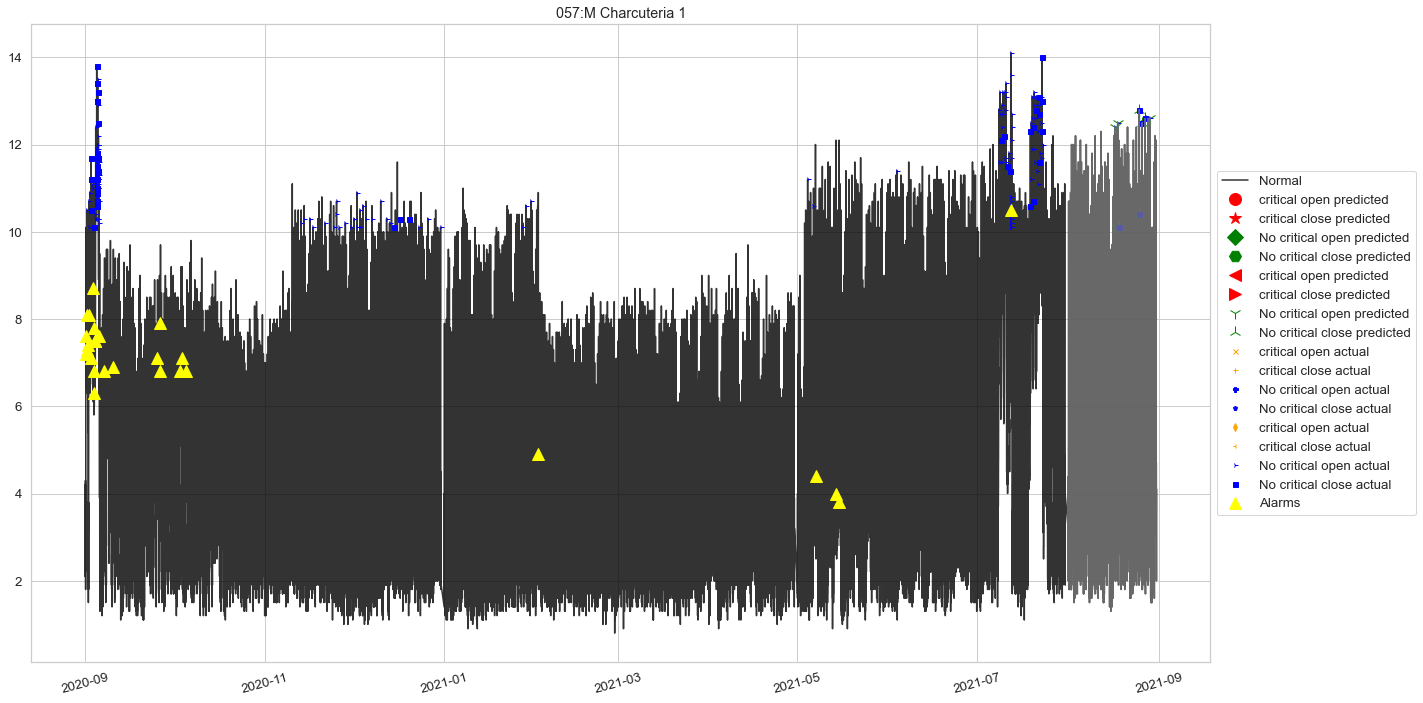

1


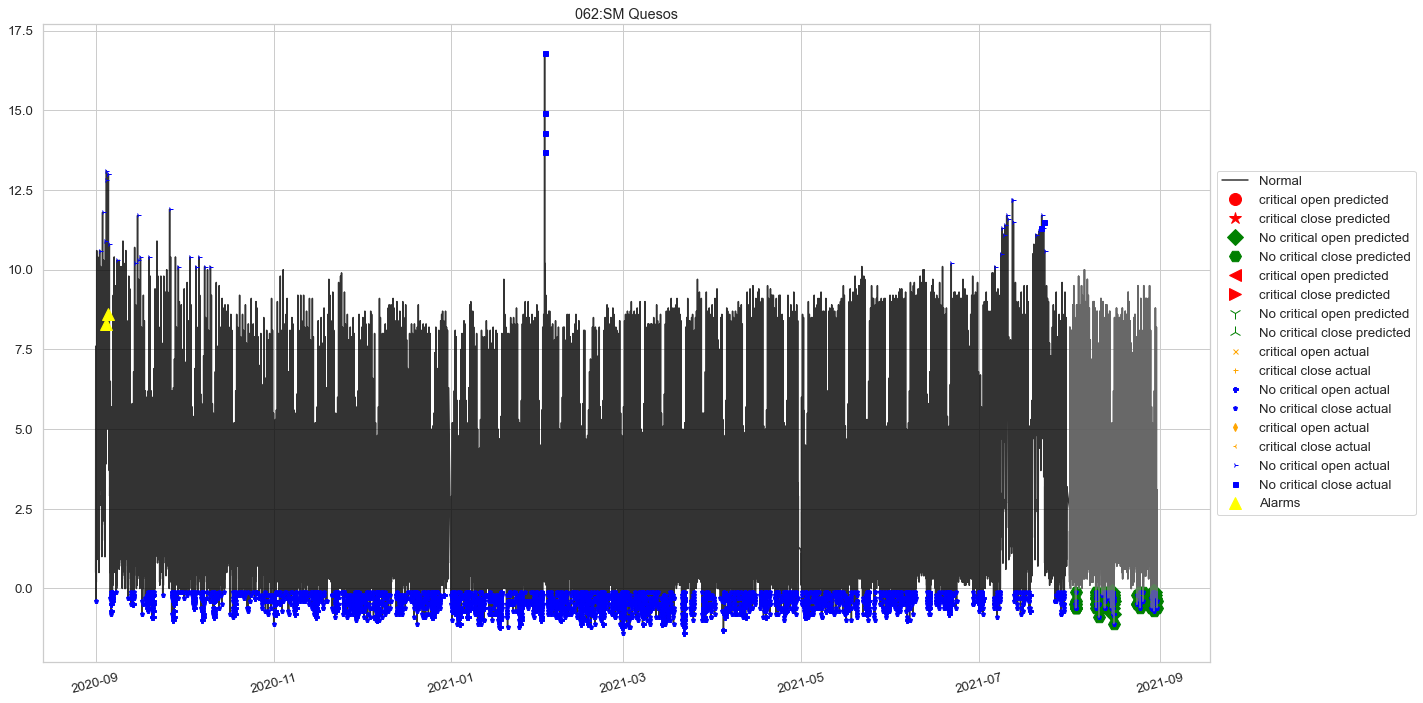

2


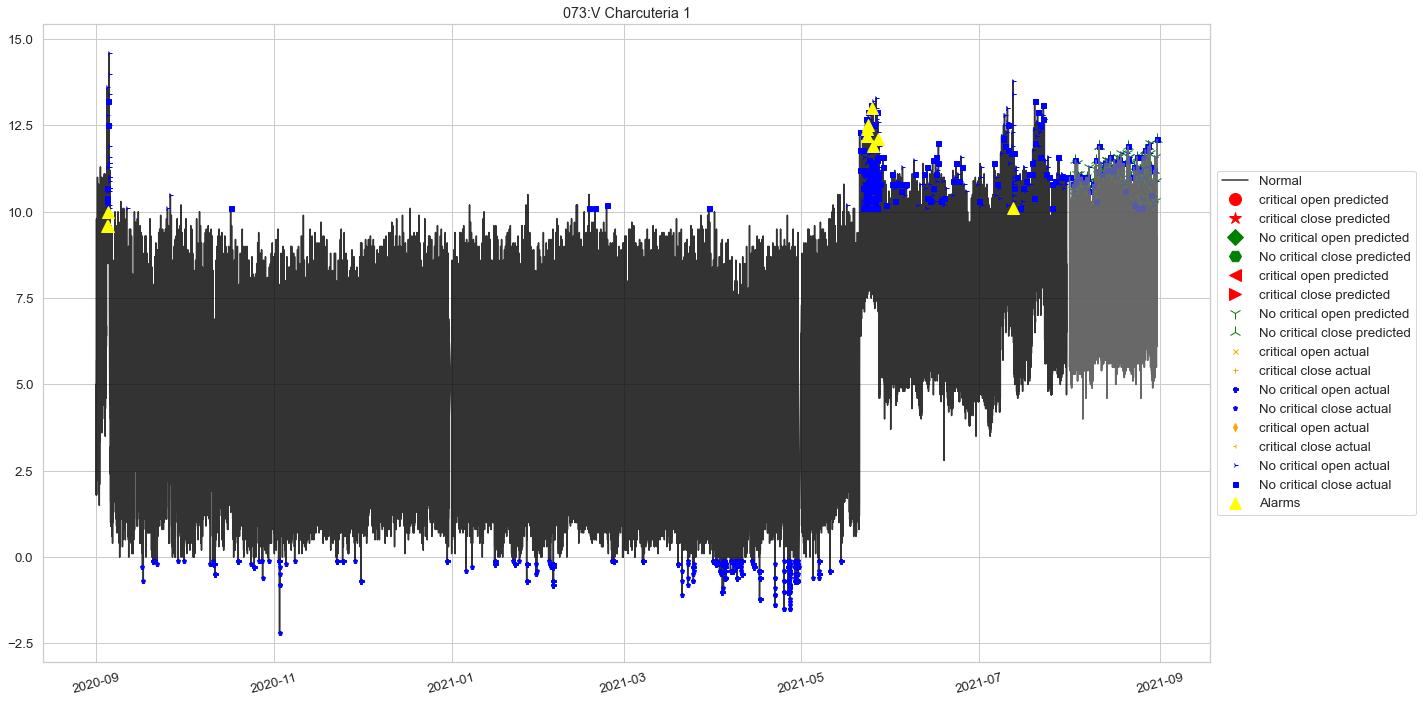

3


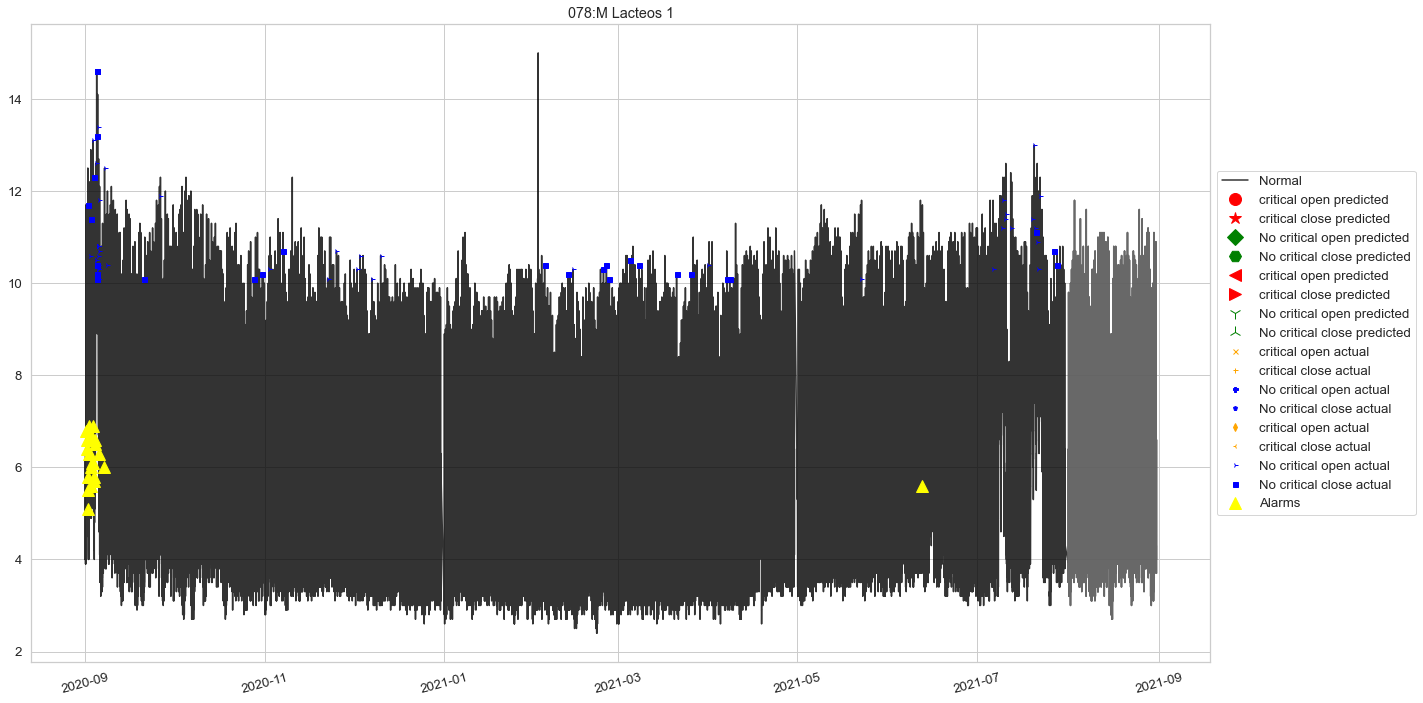

4


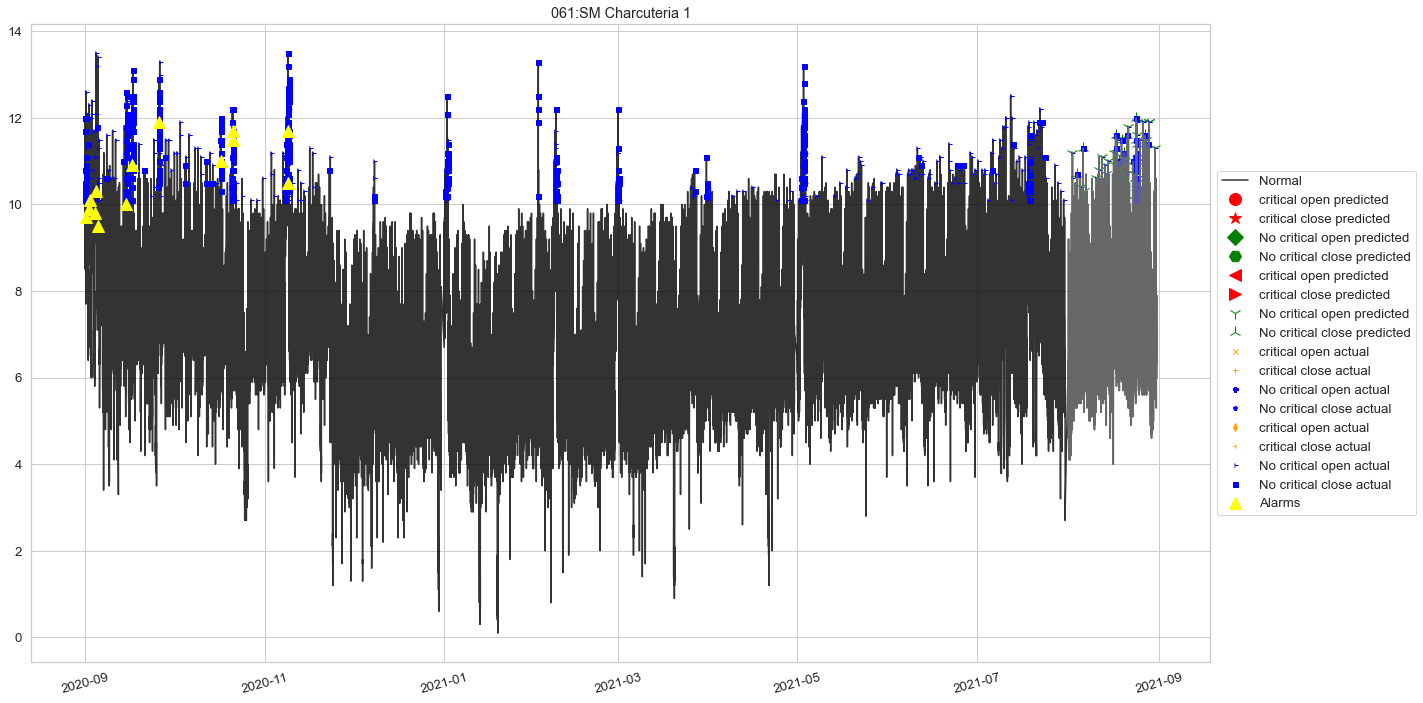

5


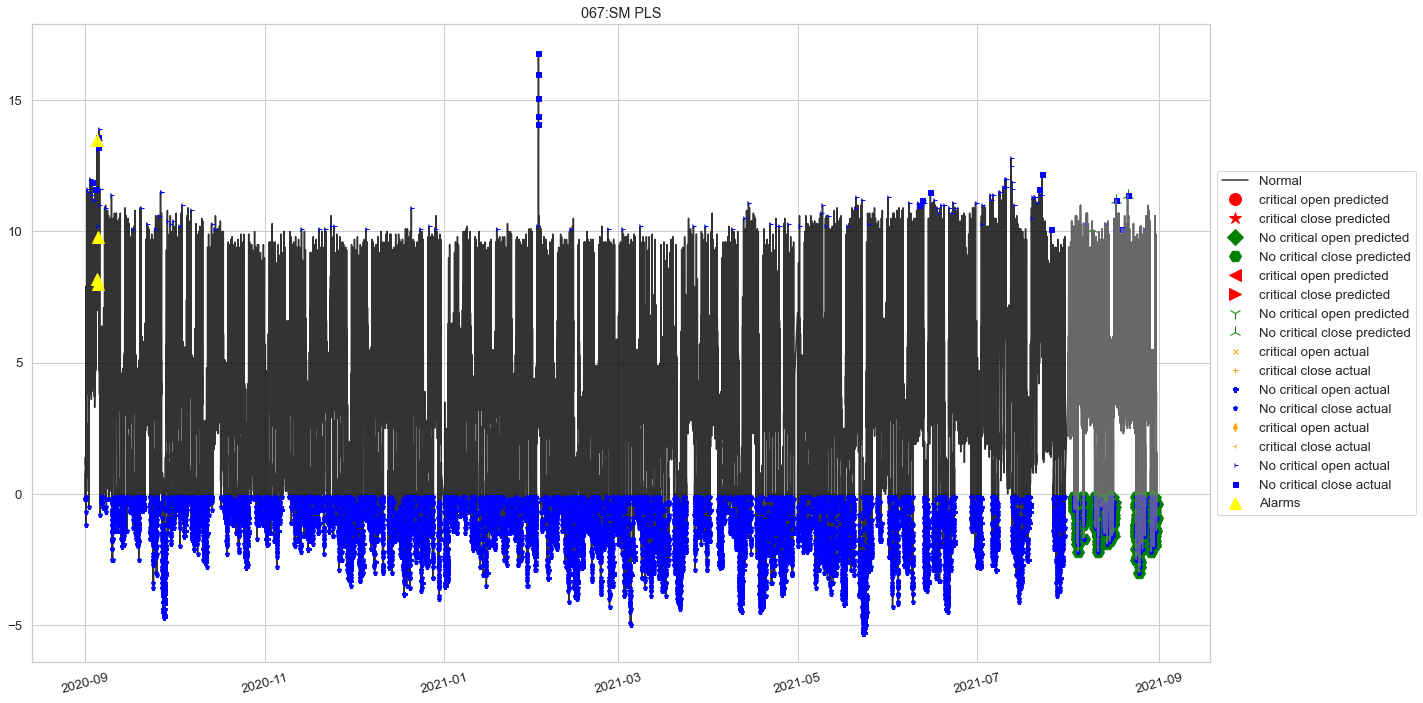

6


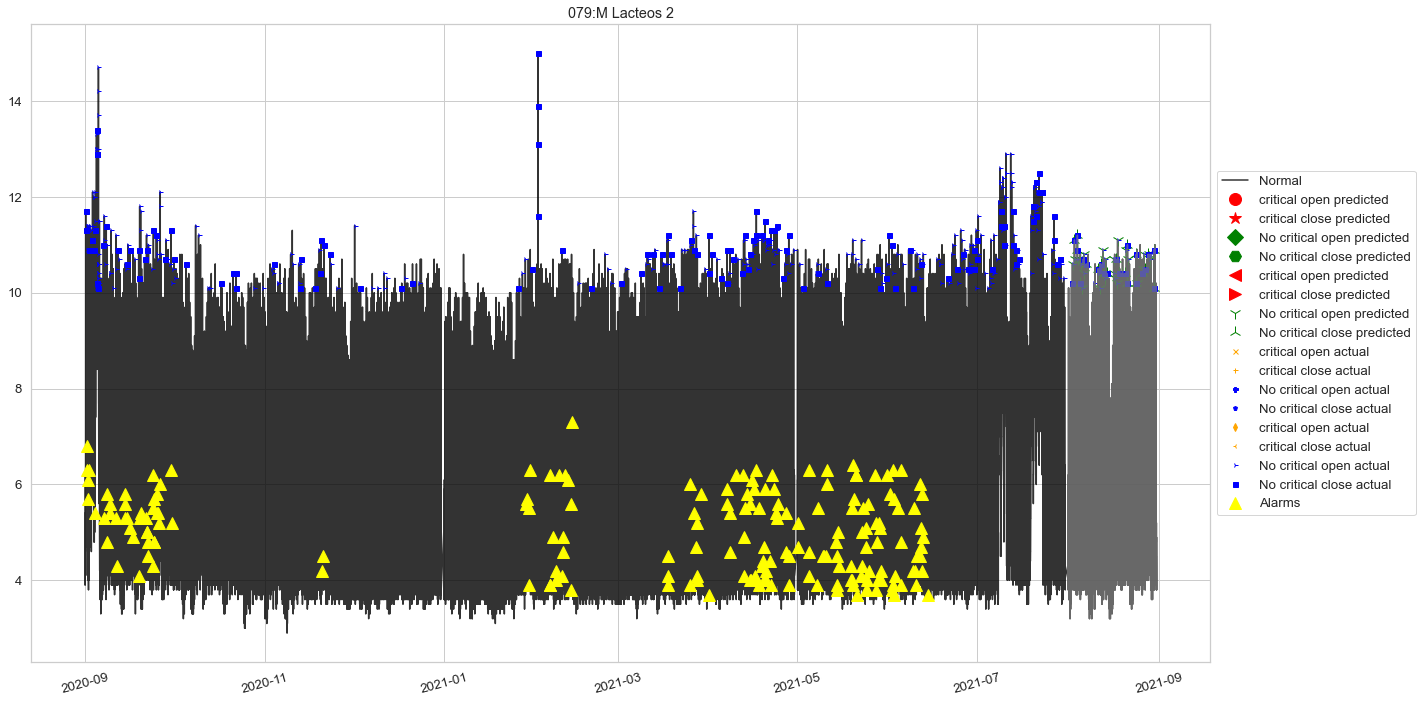

7


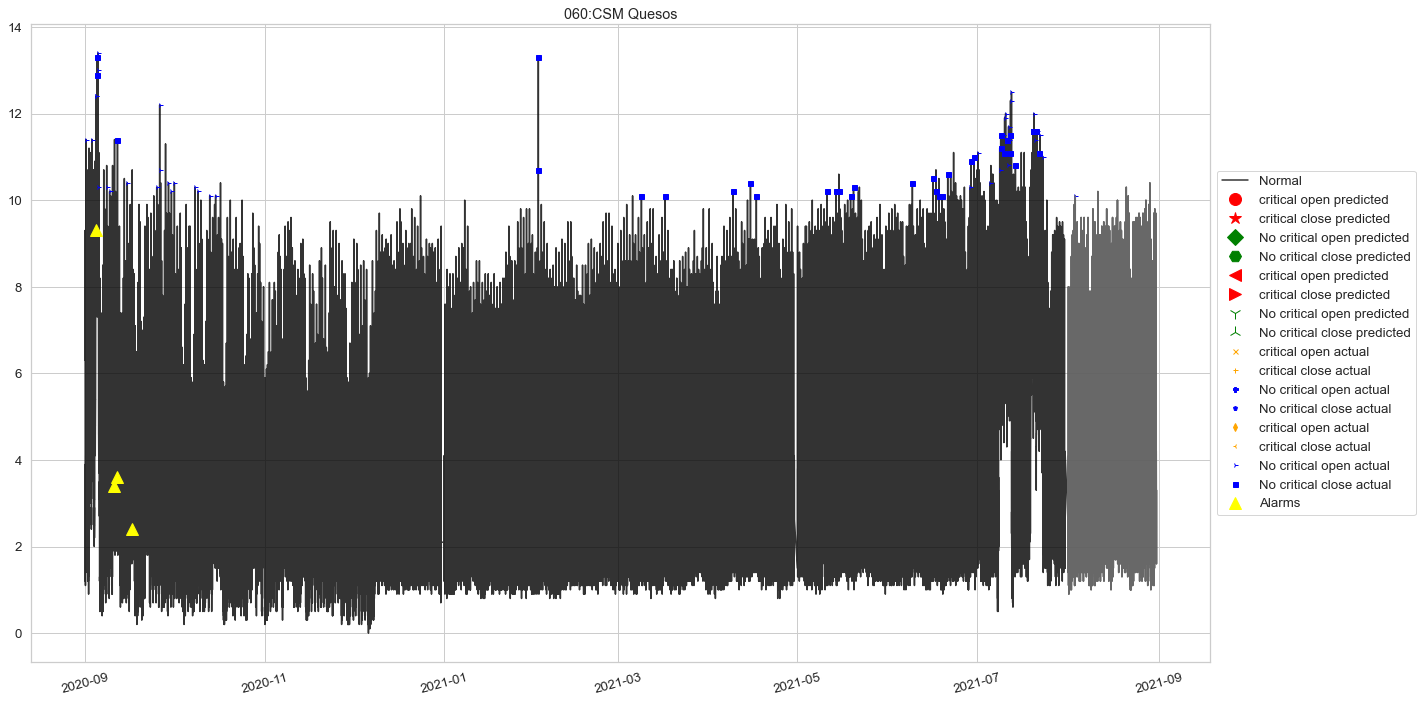

8


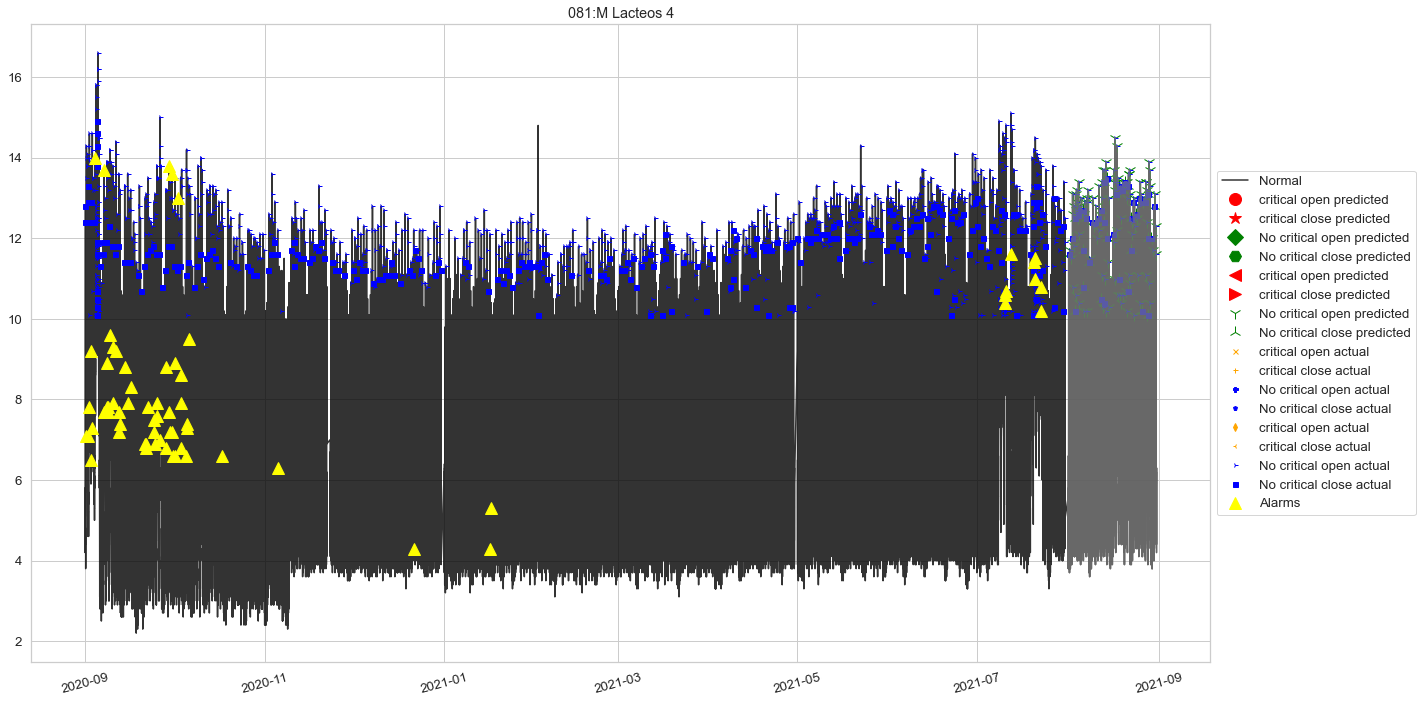

9


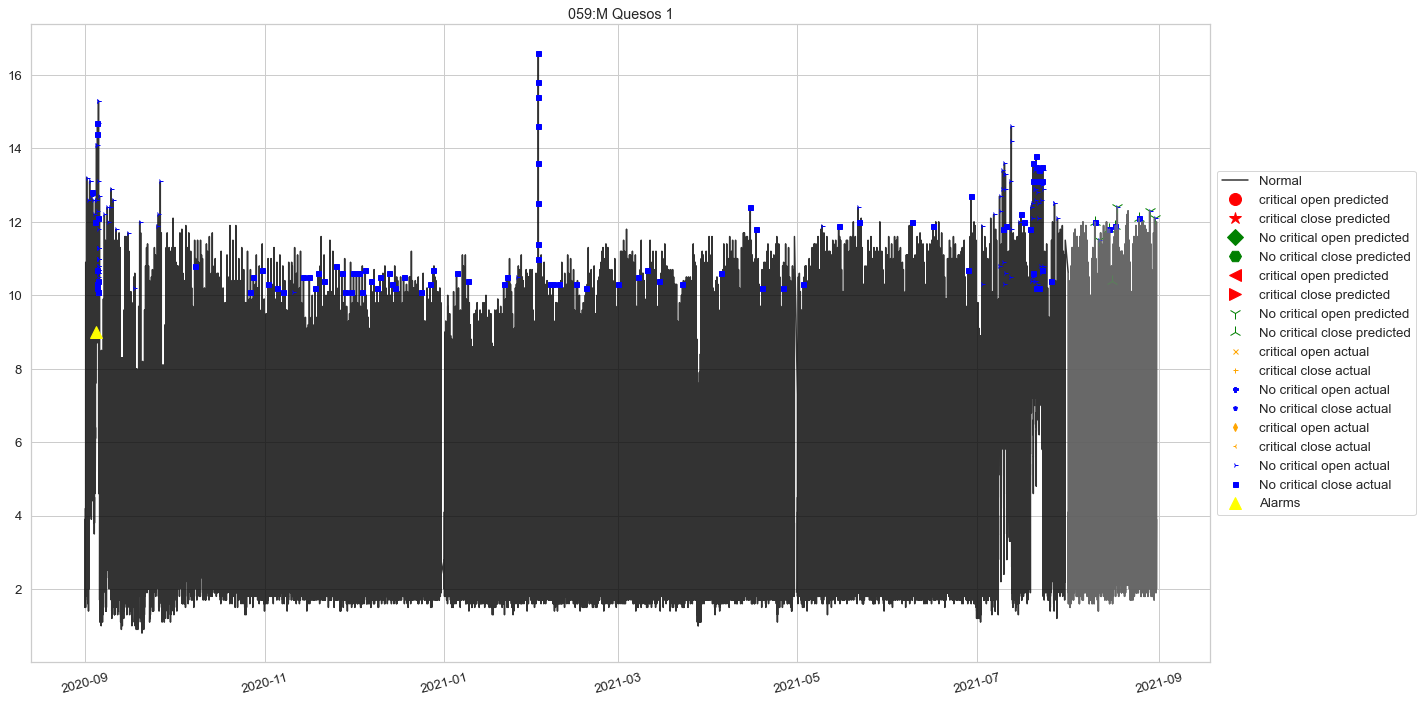

10


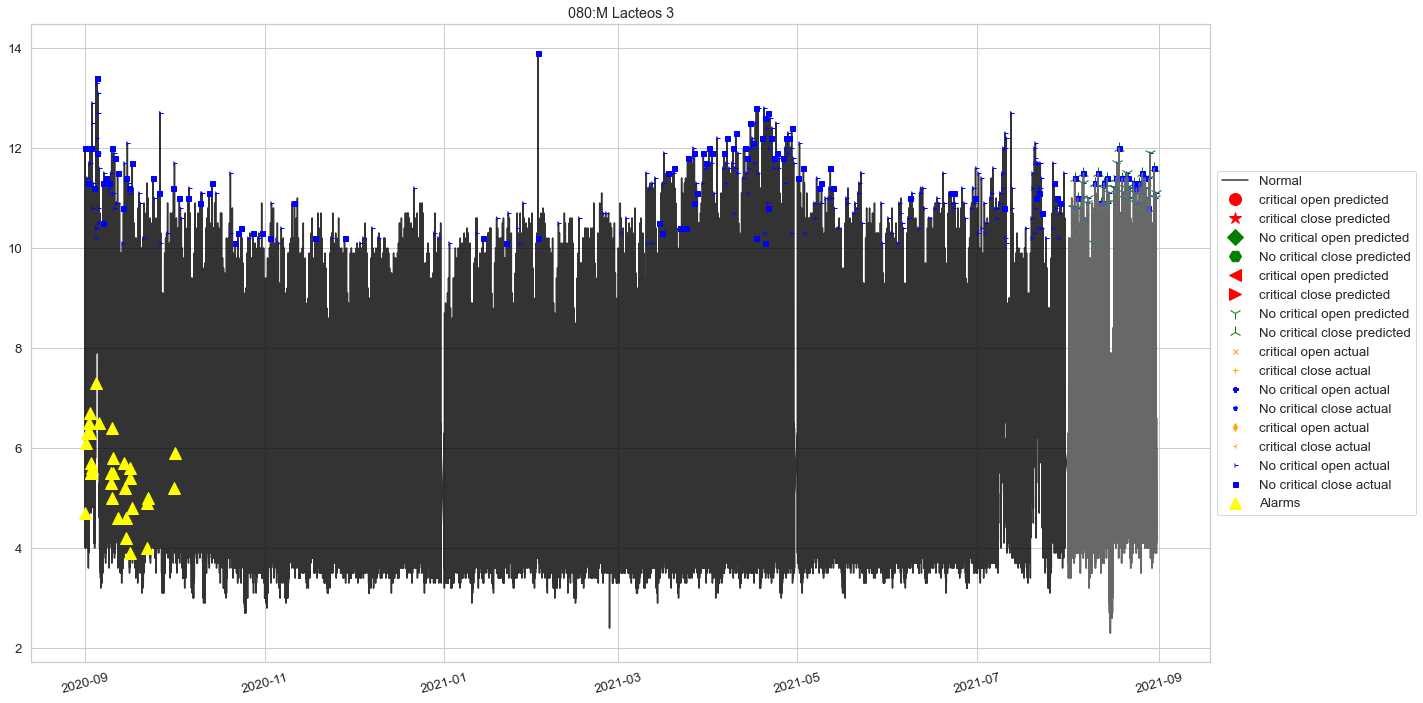

11


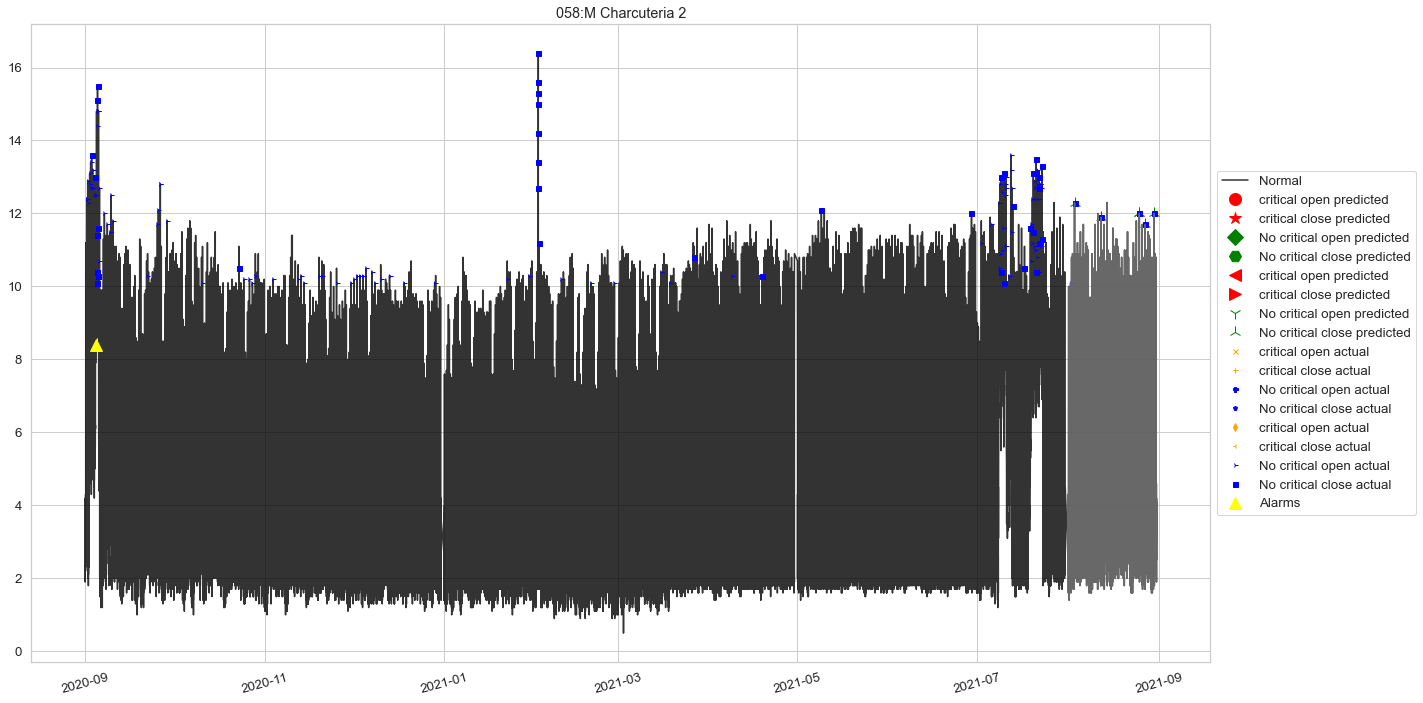

12


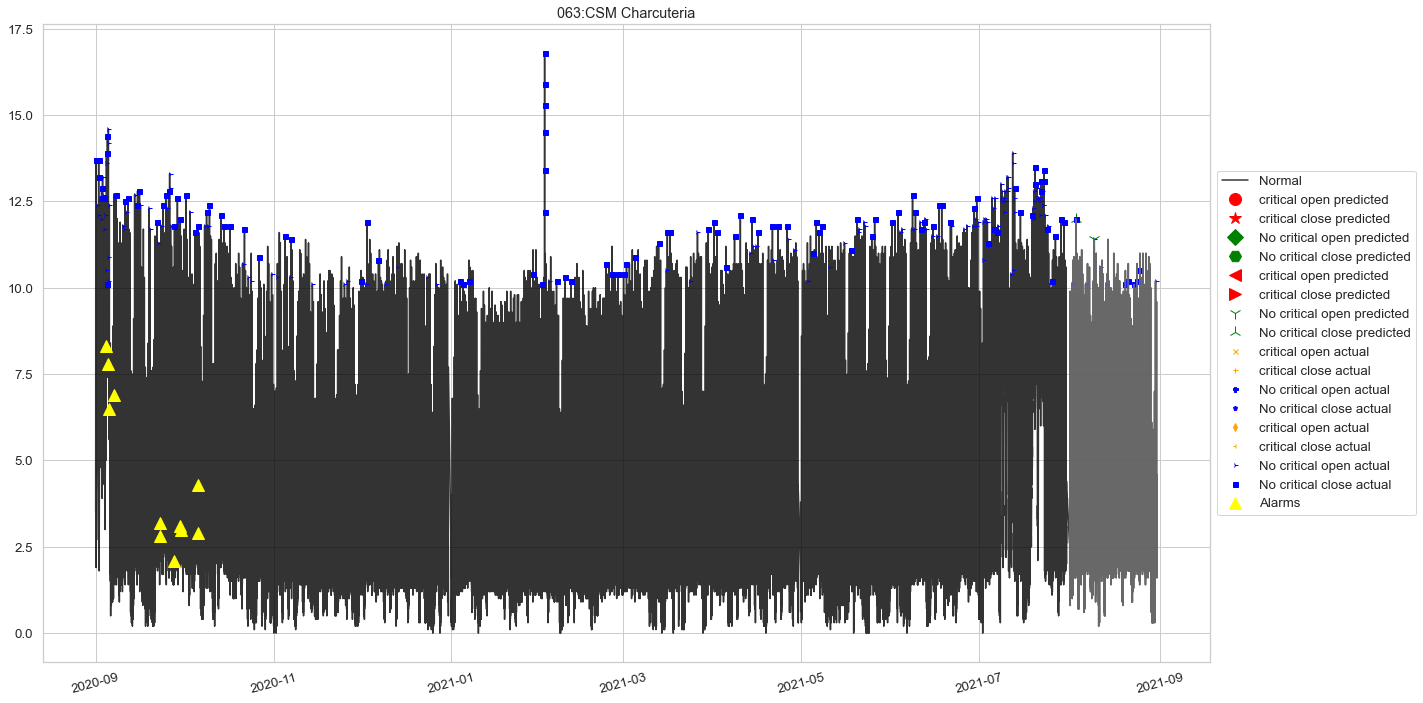

13


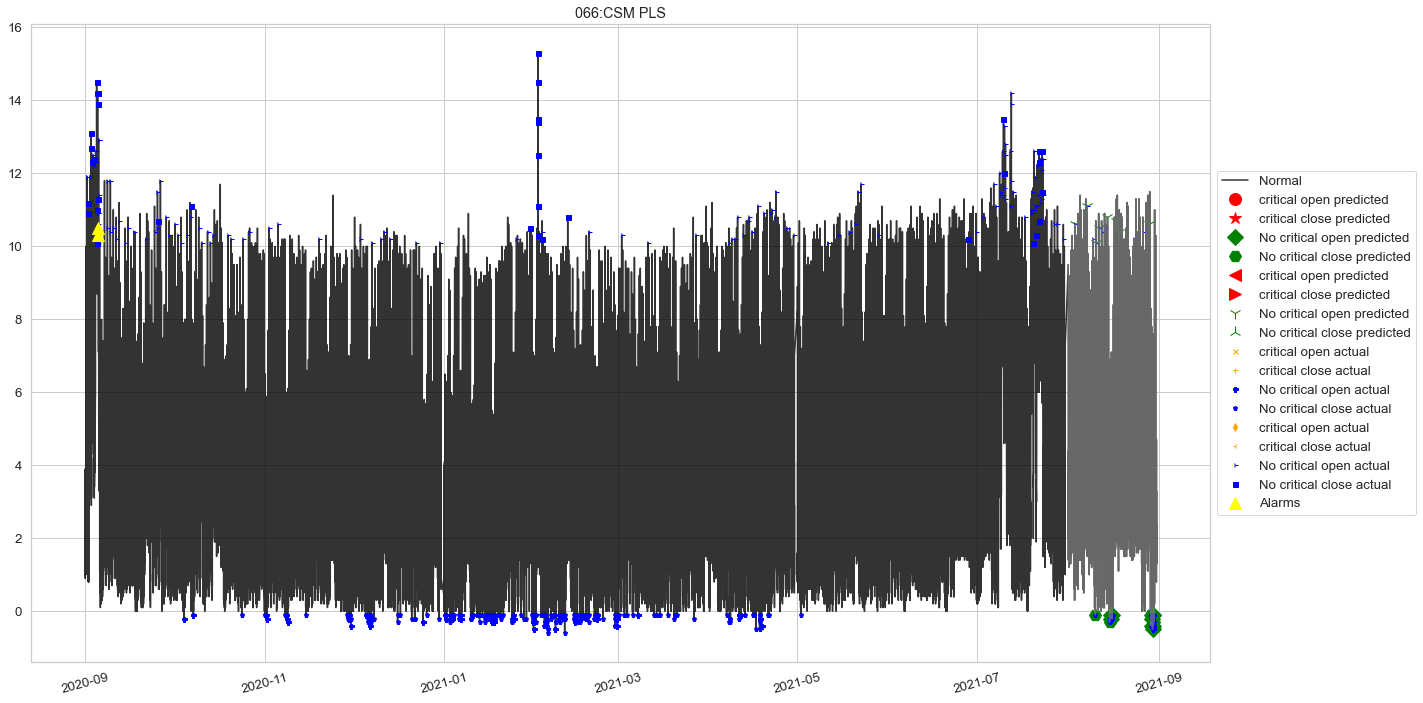

14


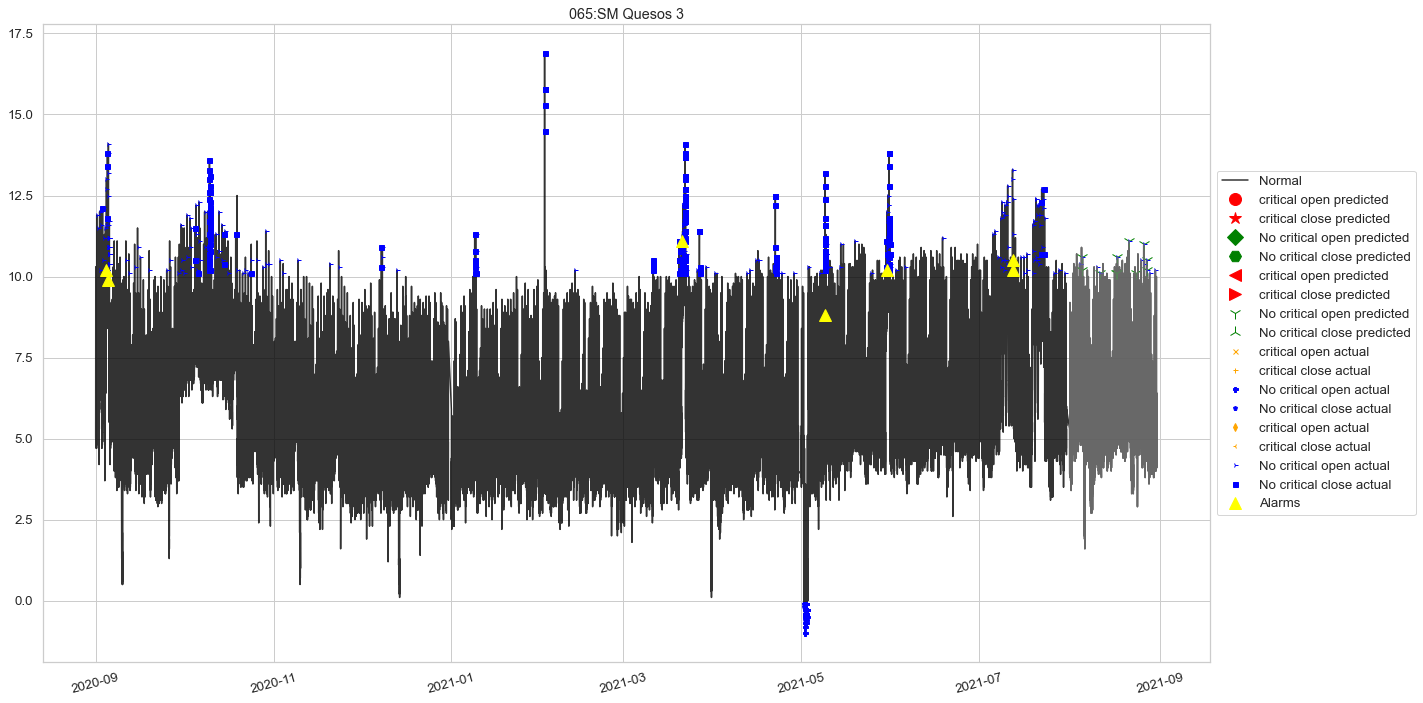

15


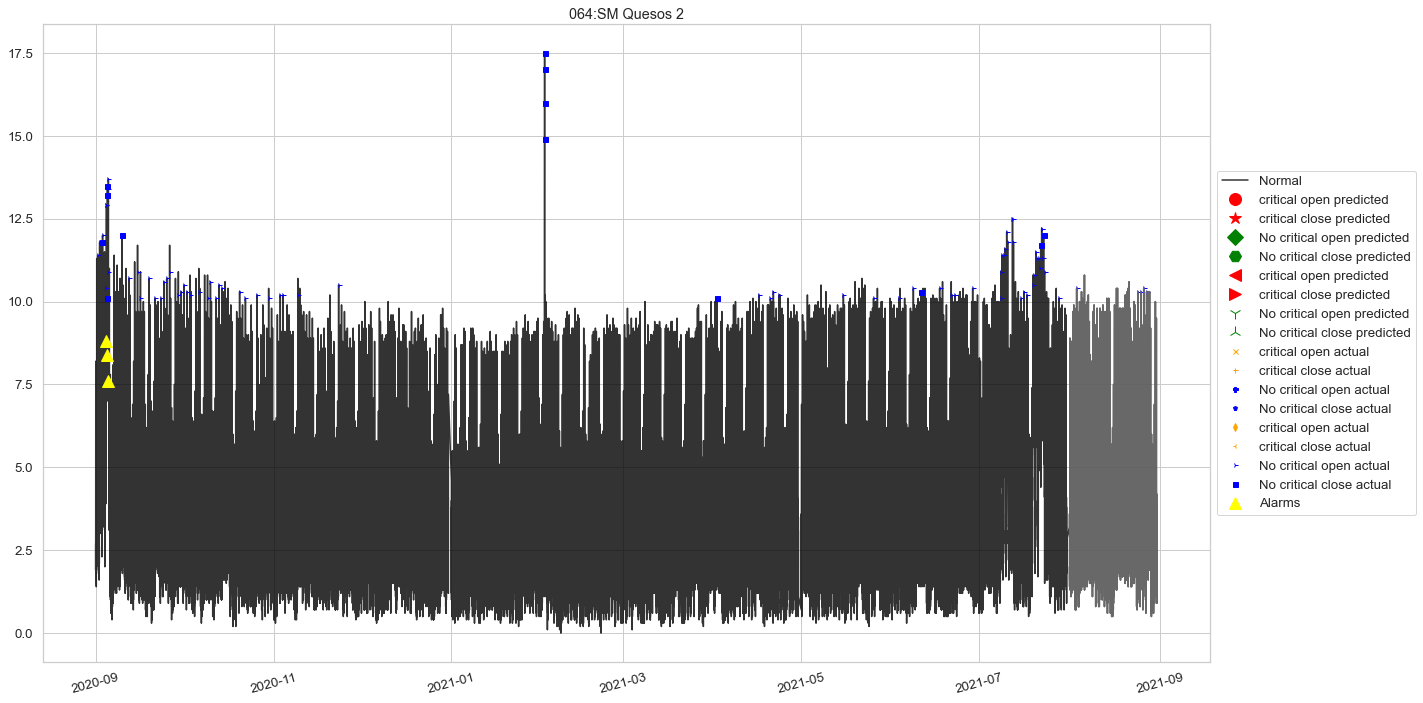

16


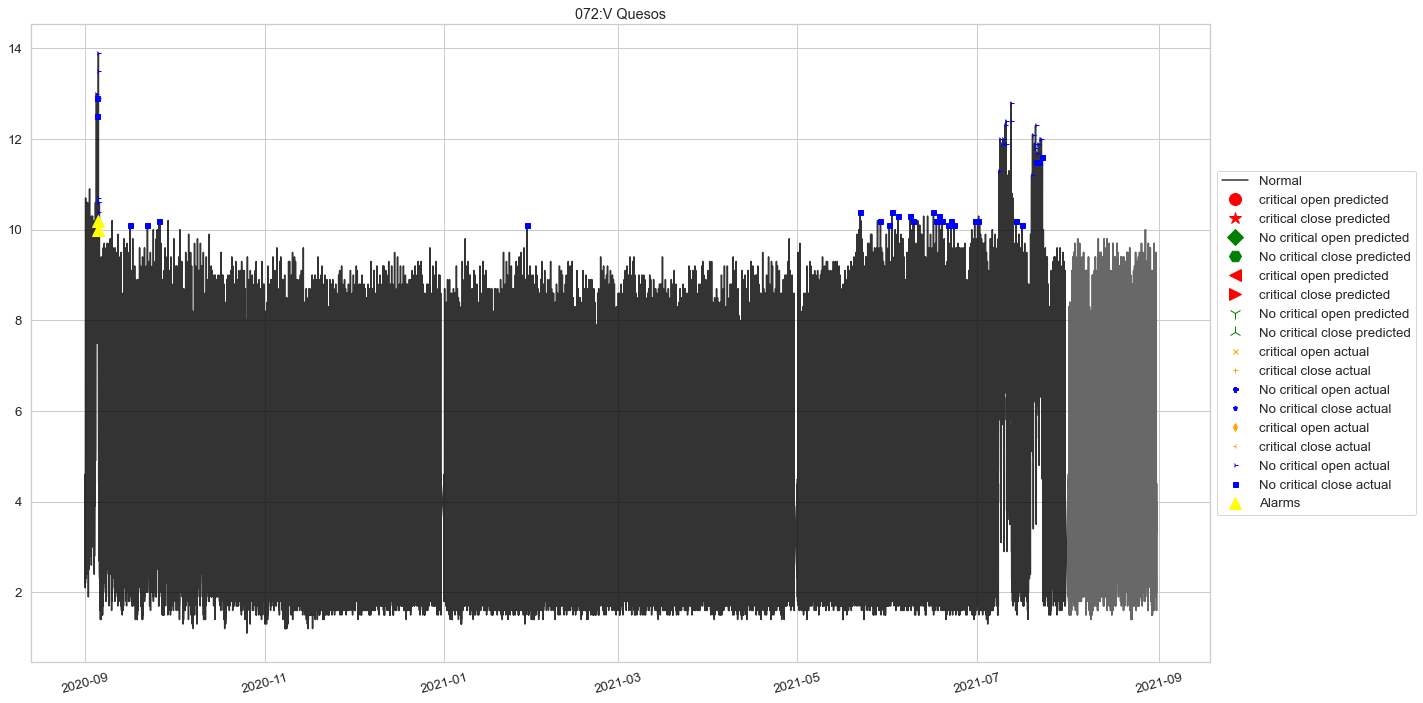

In [16]:
for i,j in enumerate(assets):
    print(i)

    predictions[i]['test']='test'
    predictions[i] = predictions[i].set_index('Timetag')

    final_show = pd.concat([actual[i],predictions[i]],axis=0)
    fig,ax = plt.subplots(figsize=(20,10))
    ax.plot(final_show.index.values,final_show.iloc[:,0], color='black',label='Normal', alpha=0.8) #initial classes
    #ax.plot(final_show[final_show['Status_'+j]==1].iloc[:,0],  color='orange', alpha=0.3,label='Defrost')#initial classes

    
    ax.plot(final_show[final_show['predictions']==2].iloc[:,0],linestyle='none', marker='o', color='red', markersize=12,label='critical open predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==3].iloc[:,0],linestyle='none', marker='*', color='red', markersize=12,label='critical close predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==4].iloc[:,0],linestyle='none', marker='D', color='green', markersize=12,label='No critical open predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==5].iloc[:,0],linestyle='none', marker='H', color='green', markersize=12,label='No critical close predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==6].iloc[:,0],linestyle='none', marker='<', color='red', markersize=12,label='critical open predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==7].iloc[:,0],linestyle='none', marker='>', color='red', markersize=12,label='critical close predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==8].iloc[:,0],linestyle='none', marker='1', color='green', markersize=12,label='No critical open predicted')#initial classes
    ax.plot(final_show[final_show['predictions']==9].iloc[:,0],linestyle='none', marker='2', color='green', markersize=12,label='No critical close predicted')#initial classes



    ax.plot(final_show[final_show['Status_'+j]==2].iloc[:,0], linestyle='none', marker='x', color='orange', markersize=5,label='critical open actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==3].iloc[:,0], linestyle='none', marker='+', color='orange', markersize=5,label='critical close actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==4].iloc[:,0], linestyle='none', marker='P', color='blue', markersize=5,label='No critical open actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==5].iloc[:,0], linestyle='none', marker='p', color='blue', markersize=5,label='No critical close actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==6].iloc[:,0], linestyle='none', marker='d', color='orange', markersize=5,label='critical open actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==7].iloc[:,0], linestyle='none', marker='3', color='orange', markersize=5,label='critical close actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==8].iloc[:,0], linestyle='none', marker='4', color='blue', markersize=5,label='No critical open actual')#initial classes
    ax.plot(final_show[final_show['Status_'+j]==9].iloc[:,0], linestyle='none', marker='s', color='blue', markersize=5,label='No critical close actual')#initial classes





    ax.plot(alarms[i].iloc[:,0],linestyle='none', marker='^', color='yellow', markersize=12,label='Alarms')#initial classes
    ax.plot(final_show[final_show['test']=='test'].iloc[:,0],color='grey', alpha=0.7)
    ax.set_title(j)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)   ) 
    ax.tick_params(axis='x',labelrotation=15)

        
    fig.tight_layout()
    plt.show()
    